Select the shapefile(s) for the main plot:
1: adi.shp
2: CITIES.SHP
3: COUNTIES.SHP
4: DRAINAGE.SHP
5: LAKES.SHP
6: places.shp
7: Rivers.shp
8: ROADS.SHP
9: ROADS_RT.SHP
10: STATES.SHP
11: zip_usa.shp


Enter the numbers of the shapefiles (comma-separated, e.g., 1,3,5):  7,10,5


Select the shapefile for the inset:
1: adi.shp
2: CITIES.SHP
3: COUNTIES.SHP
4: DRAINAGE.SHP
5: LAKES.SHP
6: places.shp
7: Rivers.shp
8: ROADS.SHP
9: ROADS_RT.SHP
10: STATES.SHP
11: zip_usa.shp


Enter the number of the shapefile:  3


Available attributes:
1: NAME
2: STATE_NAME
3: STATE_FIPS
4: CNTY_FIPS
5: FIPS
6: AREA
7: POP1990
8: POP1999
9: POP90_SQMI
10: HOUSEHOLDS
11: MALES
12: FEMALES
13: WHITE
14: BLACK
15: AMERI_ES
16: ASIAN_PI
17: OTHER
18: HISPANIC
19: AGE_UNDER5
20: AGE_5_17
21: AGE_18_29
22: AGE_30_49
23: AGE_50_64
24: AGE_65_UP
25: NEVERMARRY
26: MARRIED
27: SEPARATED
28: WIDOWED
29: DIVORCED
30: HSEHLD_1_M
31: HSEHLD_1_F
32: MARHH_CHD
33: MARHH_NO_C
34: MHH_CHILD
35: FHH_CHILD
36: HSE_UNITS
37: VACANT
38: OWNER_OCC
39: RENTER_OCC
40: MEDIAN_VAL
41: MEDIANRENT
42: UNITS_1DET
43: UNITS_1ATT
44: UNITS2
45: UNITS3_9
46: UNITS10_49
47: UNITS50_UP
48: MOBILEHOME
49: NO_FARMS87
50: AVG_SIZE87
51: CROP_ACR87
52: AVG_SALE87
53: geometry


Enter the number of the attribute to filter by:  2


Unique values in 'STATE_NAME': ['Minnesota' 'Washington' 'Idaho' 'Montana' 'North Dakota' 'Maine'
 'Wisconsin' 'Oregon' 'South Dakota' 'New Hampshire' 'Vermont' 'New York'
 'Wyoming' 'Iowa' 'Nebraska' 'Massachusetts' 'Illinois' 'Connecticut'
 'Rhode Island' 'Utah' 'California' 'Pennsylvania' 'Nevada' 'Ohio'
 'Indiana' 'New Jersey' 'Colorado' 'West Virginia' 'Missouri' 'Kansas'
 'Delaware' 'Maryland' 'Virginia' 'Kentucky' 'District of Columbia'
 'Arizona' 'Oklahoma' 'New Mexico' 'Tennessee' 'North Carolina' 'Texas'
 'Arkansas' 'South Carolina' 'Alabama' 'Mississippi' 'Georgia' 'Louisiana'
 'Florida' 'Michigan' 'Hawaii' 'Alaska']


Enter the value to filter by in 'STATE_NAME':  Tennessee


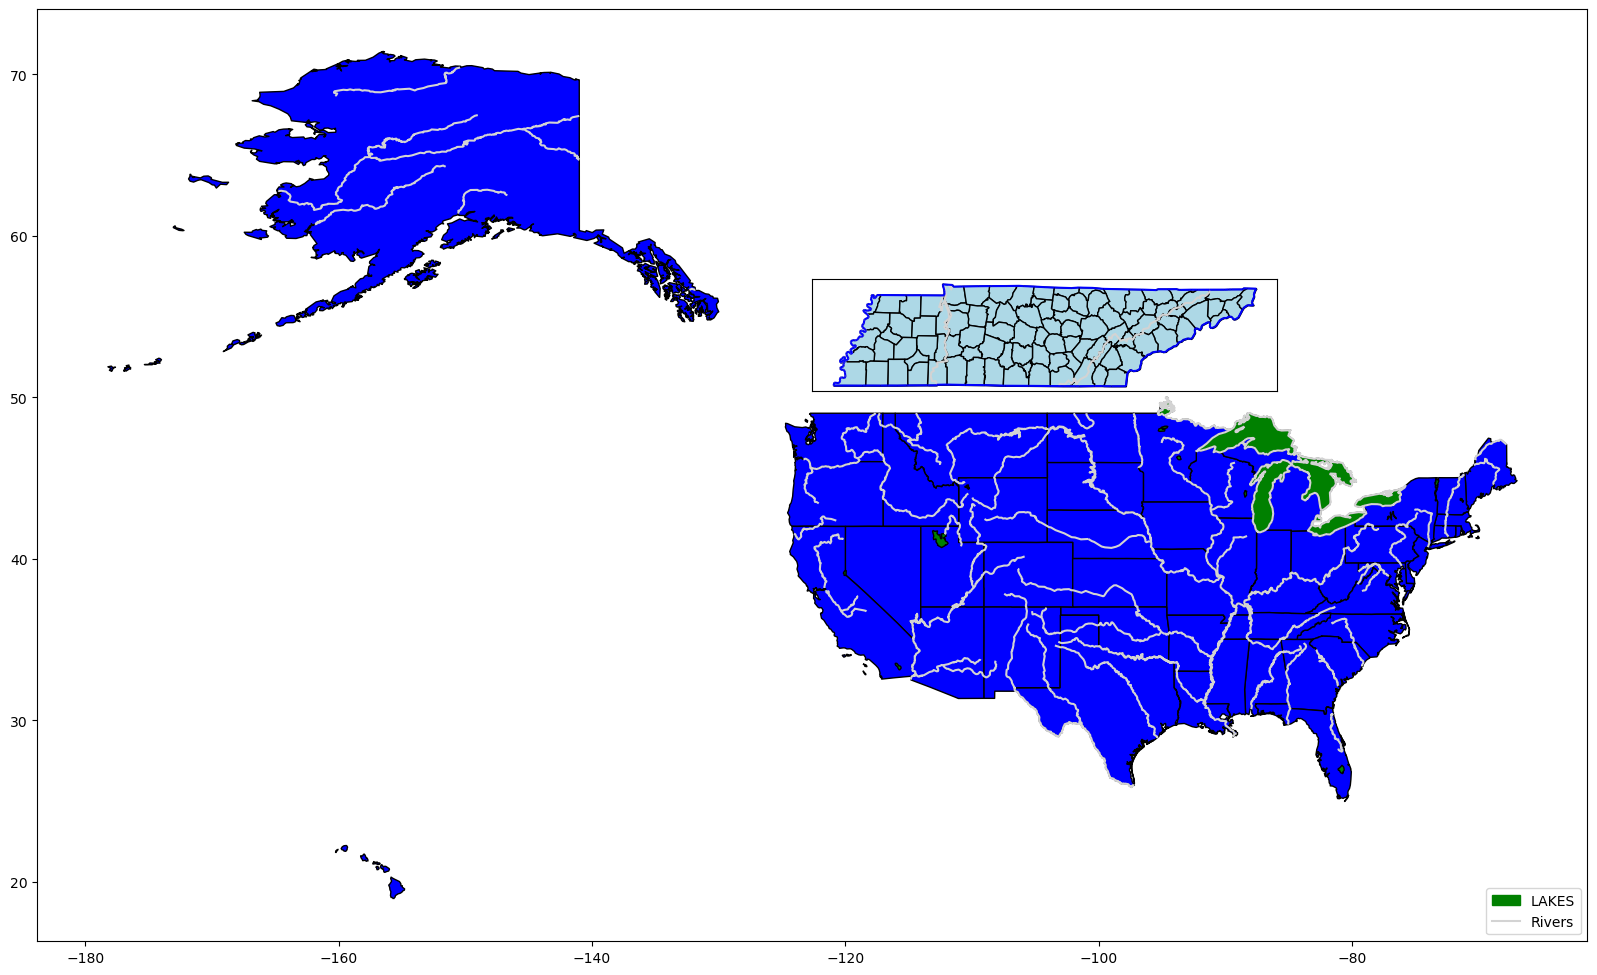

In [113]:
import geopandas as gpd  # For working with geospatial data
import os  # For file and directory management
import matplotlib.pyplot as plt  # For creating plots
import matplotlib.patches as mpatches  # For creating polygon legends
import matplotlib.lines as mlines  # For creating line and point legends

# Path to the folder containing the shapefiles
gdb_path = r'C:\Users\zmrplaza\OneDrive - The University of Memphis\Classes\Adv. GIS\Archivos\Oct24\USA'

# Function to list all shapefiles (.shp) in a directory and its subdirectories
def list_shapefiles(gdb_path):
    shapefiles = []
    for root, dirs, files in os.walk(gdb_path):  # Walk through all directories and files
        for file in files:  # Check each file
            if file.lower().endswith('.shp'):  # If the file is a shapefile, add it to the list
                shapefiles.append(os.path.join(root, file))  
    return shapefiles

# Function to let the user select shapefiles for plotting
def get_user_shapefile(shapefiles, prompt):
    while True:
        # Display the prompt and list all shapefiles
        print(prompt)
        for idx, shp in enumerate(shapefiles, start=1):
            print(f'{idx}: {os.path.basename(shp)}')  # Show the index and filename

        # Allow multiple shapefiles for the main plot
        if "main plot" in prompt: 
            choices = input("Enter the numbers of the shapefiles (comma-separated, e.g., 1,3,5): ")
            choices = [x.strip() for x in choices.split(",")]  # Split input into a list
            
            # Validate user input
            valid_choices = []
            for choice in choices:
                if choice.isdigit() and 1 <= int(choice) <= len(shapefiles):  # Check if input is valid
                    valid_choices.append(int(choice) - 1)  # Convert to index
                else:
                    print(f"Invalid choice: {choice}. Please enter valid numbers.")
                    break  # Exit loop if invalid input
            else:
                # Return the selected shapefiles as a list of paths
                return [shapefiles[choice] for choice in valid_choices]
        
        # Right now for the inset, this code allows only one shapefile
        else:
            choice = input("Enter the number of the shapefile: ")
            if choice.isdigit() and 1 <= int(choice) <= len(shapefiles):  # Check if the user's choice is a digit and within the valid range of shapefiles
                return shapefiles[int(choice) - 1]  # Return the selected shapefile path
            else:
                print(f"Invalid choice: {choice}. Please enter a valid number.")

# Function to filter a GeoDataFrame based on an attribute
def get_attribute_filter(gdf):
    while True:
        print("Available attributes:")  # Display available columns in the GeoDataFrame
        for idx, column in enumerate(gdf.columns, start=1):
            print(f'{idx}: {column}')  # Show index and column name
        
        # Prompt the user to enter the number corresponding to the attribute they want to filter by
        attr_choice = input("Enter the number of the attribute to filter by: ")
  
        # Check if the input is a digit and within the valid range of attribute indices
        if attr_choice.isdigit() and 1 <= int(attr_choice) <= len(gdf.columns):  # Validate input
            # Retrieve the name of the chosen attribute column based on user input
            attr_name = gdf.columns[int(attr_choice) - 1]  # Get the chosen column name

            # Display unique values in the chosen column
            unique_values = gdf[attr_name].unique()
            print(f"Unique values in '{attr_name}': {unique_values}")

            # Ask the user for a value to filter by
            attr_value = input(f"Enter the value to filter by in '{attr_name}': ")
            # Return a filtered GeoDataFrame based on the specified attribute value
            # The filtering checks if the attribute (attr_name) contains the given value (attr_value)
            # The search is case-insensitive and ignores NaN values
            return gdf[gdf[attr_name].str.contains(attr_value, case=False, na=False)]
        else:
            print(f"Invalid choice: {attr_choice}. Please enter a valid number.")

# Function to create a map with an inset
def create_inset_map(main_gdfs, inset_gdf, ax, inset_position=[0.5, 0.5, 0.3, 0.3]):
    # Create an inset axes on the main plot
    ax_inset = ax.inset_axes(inset_position)
    
    # Dictionary to store legend handles for different geometry types
    legend_handles = {
        'Polygon': [],
        'LineString': [],
        'Point': []
    }

    # Define colors for the layers
    colors = ['lightgray', 'blue', 'green', 'red', 'purple'] 
    for i, main_gdf in enumerate(main_gdfs):  # Loop through each main GeoDataFrame
        geom_type = main_gdf.geometry.geom_type.unique()[0]  # Get the geometry type
        
        # Plot on the main axes
        main_gdf.plot(ax=ax, color=colors[i % len(colors)], edgecolor='black', legend=True)
        
        # Clip the main GeoDataFrame with the inset GeoDataFrame
        clipped_main_gdf = gpd.clip(main_gdf, inset_gdf)  
        # Plot the clipped main GeoDataFrame on the inset map
        # Use the specified axis (ax_inset) for plotting
        # Set the color using a cyclic index based on the colors list
        # Use black for the edge color of the geometries
        clipped_main_gdf.plot(ax=ax_inset, color=colors[i % len(colors)], edgecolor='black')
        
        # Create legend entries based on geometry type
        # Check if the geometry type is 'Polygon'
        if geom_type == 'Polygon':
            # Create a patch for the polygon with the corresponding color and label
            patch = mpatches.Patch(color=colors[i % len(colors)], label=os.path.basename(main_shapefiles[i]).split('.')[0])
            # Append the patch to the legend handles for polygons
            legend_handles['Polygon'].append(patch)
        # Check if the geometry type is 'LineString'
        elif geom_type == 'LineString':
            # Create a line object for the line string with the corresponding color and label
            line = mlines.Line2D([], [], color=colors[i % len(colors)], label=os.path.basename(main_shapefiles[i]).split('.')[0])
            # Append the line object to the legend handles for line strings
            legend_handles['LineString'].append(line)
        # Check if the geometry type is 'Point'
        elif geom_type == 'Point':
            # Create a marker for the point with the corresponding color and label
            marker = mlines.Line2D([], [], color=colors[i % len(colors)], marker='o', linestyle='None', label=os.path.basename(main_shapefiles[i]).split('.')[0]) 
            # Append the marker to the legend handles for points
            legend_handles['Point'].append(marker)

        # Plot the inset GeoDataFrame
    inset_geom_type = inset_gdf.geometry.geom_type.unique()[0]  # Get the unique geometry type of the inset GeoDataFrame
    if inset_geom_type == 'Point':  # Check if the geometry type is 'Point'
        # Plot the points in the inset with a red color and specified marker size
        inset_gdf.plot(ax=ax_inset, color='red', markersize=50, label=os.path.basename(inset_shapefile).split('.')[0]) 
    else:
        # Plot other geometry types in the inset with a light blue color and black edges
        inset_gdf.plot(ax=ax_inset, color='lightblue', edgecolor='black', label=os.path.basename(inset_shapefile).split('.')[0])  

    # Remove ticks from the inset map
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])

    # Add legend to the main plot
    legend_elements = []
    for geom_type, handles in legend_handles.items():
        if handles:  # Only add legend entries if there are handles
            legend_elements.extend(handles)
    
    ax.legend(handles=legend_elements, loc="lower right")

# Main execution

# List all shapefiles in the directory
shapefiles = list_shapefiles(gdb_path)

# Let the user select shapefiles for the main plot and inset
main_shapefiles = get_user_shapefile(shapefiles, "Select the shapefile(s) for the main plot:")
inset_shapefile = get_user_shapefile(shapefiles, "Select the shapefile for the inset:")

# Load the selected shapefiles into GeoDataFrames
main_gdfs = [gpd.read_file(shapefile) for shapefile in main_shapefiles]
inset_gdf = gpd.read_file(inset_shapefile)

# Apply attribute filtering to the inset GeoDataFrame
filtered_inset_gdf = get_attribute_filter(inset_gdf) 

# Create the main plot and inset map
fig, ax = plt.subplots(figsize=(20, 15))
create_inset_map(main_gdfs, filtered_inset_gdf, ax)  
plt.show()
